<a href="https://colab.research.google.com/github/rush254/ship-detection/blob/main/Ship_Detection_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle squarify pylabel ultralytics
from pylabel import importer
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import random
import ultralytics
from ultralytics import YOLO
ultralytics.checks()

Ultralytics 8.3.8 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 36.6/112.6 GB disk)


In [2]:
#@title Getting Kaggle Dataset
from google.colab import userdata

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

!kaggle datasets download -d andrewmvd/ship-detection
!mkdir data
!unzip /content/ship-detection.zip -d data

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/ship-detection
License(s): CC0-1.0
 98% 119M/122M [00:09<00:00, 18.2MB/s]
100% 122M/122M [00:09<00:00, 13.4MB/s]
Archive:  /content/ship-detection.zip
  inflating: data/annotations/boat0.xml  
  inflating: data/annotations/boat1.xml  
  inflating: data/annotations/boat10.xml  
  inflating: data/annotations/boat100.xml  
  inflating: data/annotations/boat101.xml  
  inflating: data/annotations/boat102.xml  
  inflating: data/annotations/boat103.xml  
  inflating: data/annotations/boat104.xml  
  inflating: data/annotations/boat105.xml  
  inflating: data/annotations/boat106.xml  
  inflating: data/annotations/boat107.xml  
  inflating: data/annotations/boat108.xml  
  inflating: data/annotations/boat109.xml  
  inflating: data/annotations/boat11.xml  
  inflating: data/annotations/boat110.xml  
  inflating: data/annotations/boat111.xml  
  inflating: data/annotations/boat112.xml  
  inflating: data/annotations/boat113.xml  
  inflat

In [3]:
#@title Converting Annotations to YOLO

dataset = importer.ImportVOC(path='/content/data/annotations', path_to_images="/content/data/images")
dataset.export.ExportToYoloV5('/content/data/labels')

shutil.rmtree('/content/data/annotations')

Exporting YOLO files...: 100%|██████████| 621/621 [00:02<00:00, 285.34it/s]


In [4]:
#@title Getting Image and Label Metadata

path_to_annotations = "/content/data/labels"
path_to_images = "/content/data/images"
yoloclasses = ['ship']
dataset = importer.ImportYoloV5(path=path_to_annotations, path_to_images=path_to_images, cat_names=yoloclasses,
    img_ext="png", name="ship-detection")

dataset.df.head()

Importing YOLO files...: 100%|██████████| 621/621 [00:05<00:00, 106.34it/s]


img_folder img_filename img_path  img_id  img_width  img_height  \
id                                                                              
0   /content/data/images  boat394.png                0        400         364   
1   /content/data/images  boat373.png                1        600         524   
2   /content/data/images   boat42.png                2        400         243   
3   /content/data/images   boat42.png                2        400         243   
4   /content/data/images   boat42.png                2        400         243   

    img_depth ann_segmented  ann_bbox_xmin  ann_bbox_ymin  ...  ann_iscrowd  \
id                                                         ...                
0           4                       117.02       82.99200  ...                
1           3                       293.01      245.99180  ...                
2           4                        11.00        4.99365  ...                
3           4                        27.02       42.99885  ...                
4           4                        48.02       38.00520  ...                

    ann_keypoints  ann_pose  ann_truncated  ann_difficult cat_id cat_name  \
id                                                                          
0                                                              0     ship   
1                                                              0     ship   
2                                                              0     ship   
3                                                              0     ship   
4                                                              0     ship   

   cat_supercategory split annotated  
id                                    
0                                  1  
1                                  1  
2                                  1  
3                                  1  
4                                  1  

[5 rows x 26 columns]

In [5]:
print(f"Number of images: {dataset.analyze.num_images}")
print(f"Number of classes: {dataset.analyze.num_classes}")
print(f"Classes:{dataset.analyze.classes}")
print(f"Class counts:\n{dataset.analyze.class_counts}")

Number of images: 621
Number of classes: 1
Classes:['ship']
Class counts:
cat_name
ship    1951
Name: count, dtype: int64


In [6]:
#@title Resizing Images

def resize_images(directory, new_width, new_height):
  for filename in os.listdir(directory):
    if filename.endswith(".png") or filename.endswith(".jpg") or filename.endswith(".jpeg"):
      img_path = os.path.join(directory, filename)
      img = cv2.imread(img_path)
      resized_img = cv2.resize(img, (new_width, new_height))
      cv2.imwrite(img_path, resized_img)

resize_images("/content/data/images", 640, 640)

dataset = importer.ImportYoloV5(path=path_to_annotations, path_to_images=path_to_images, cat_names=yoloclasses,
    img_ext="png", name="ship-detection")

dataset.df.head()


Importing YOLO files...: 100%|██████████| 621/621 [00:05<00:00, 106.58it/s]


img_folder img_filename img_path  img_id  img_width  img_height  \
id                                                                              
0   /content/data/images  boat394.png                0        640         640   
1   /content/data/images  boat373.png                1        640         640   
2   /content/data/images   boat42.png                2        640         640   
3   /content/data/images   boat42.png                2        640         640   
4   /content/data/images   boat42.png                2        640         640   

    img_depth ann_segmented  ann_bbox_xmin  ann_bbox_ymin  ...  ann_iscrowd  \
id                                                         ...                
0           3                      187.232        145.920  ...                
1           3                      312.544        300.448  ...                
2           3                       17.600         13.152  ...                
3           3                       43.232        113.248  ...                
4           3                       76.832        100.096  ...                

    ann_keypoints  ann_pose  ann_truncated  ann_difficult cat_id cat_name  \
id                                                                          
0                                                              0     ship   
1                                                              0     ship   
2                                                              0     ship   
3                                                              0     ship   
4                                                              0     ship   

   cat_supercategory split annotated  
id                                    
0                                  1  
1                                  1  
2                                  1  
3                                  1  
4                                  1  

[5 rows x 26 columns]

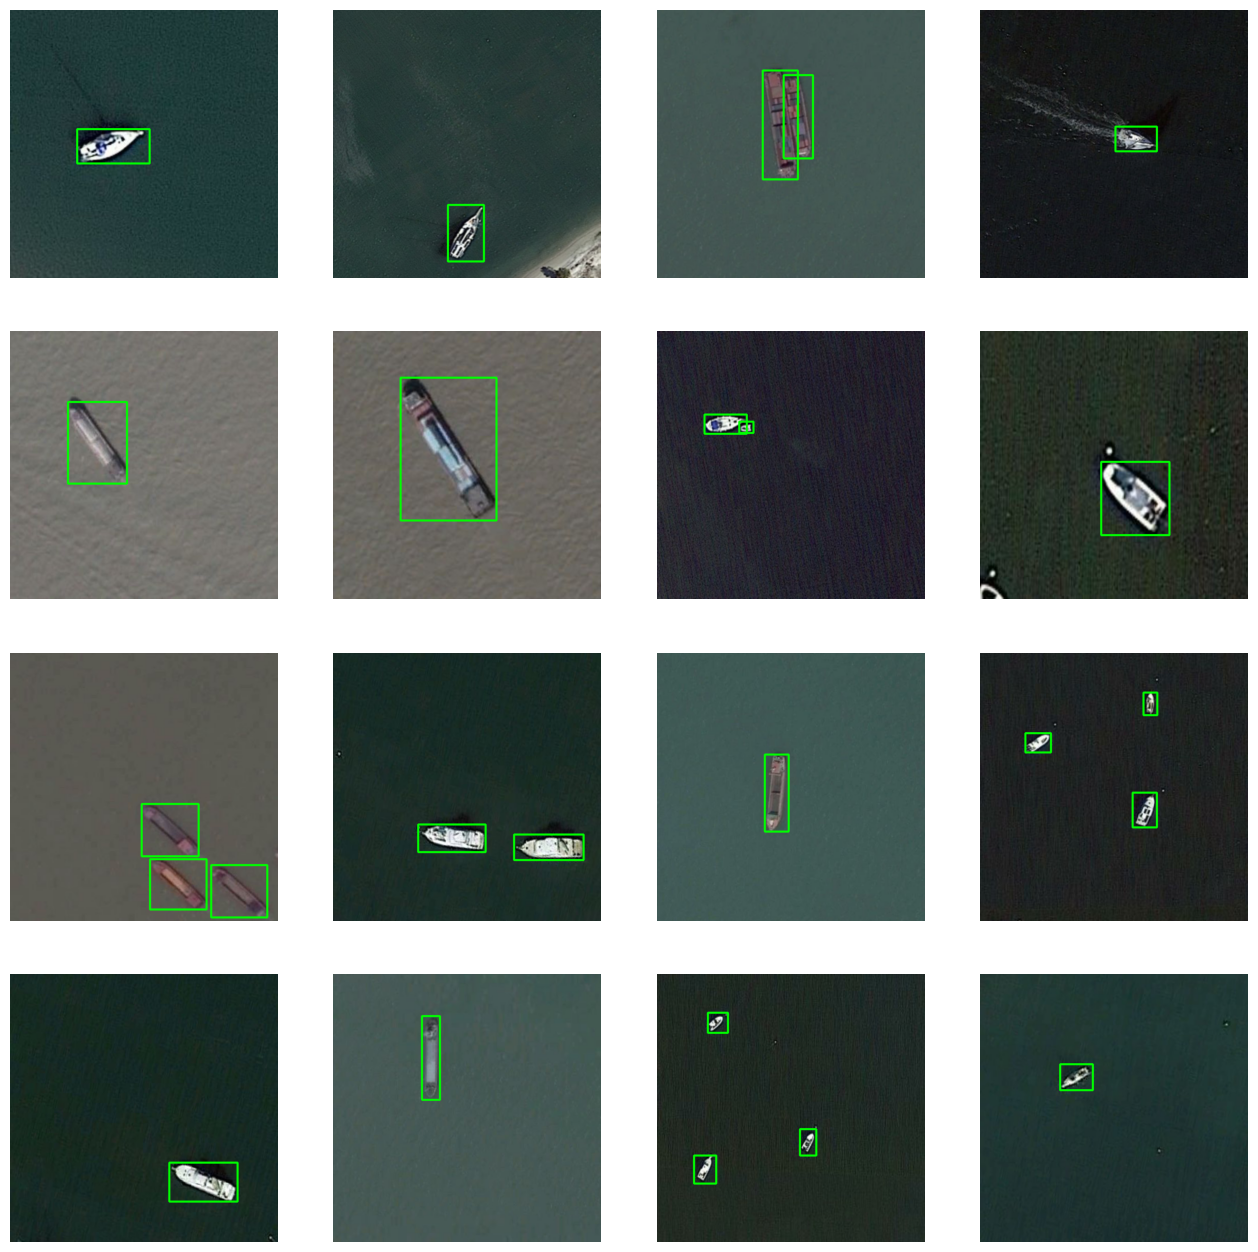

In [7]:
#@title Visualizing Images

sns.set_style('darkgrid')

%matplotlib inline

# Define the paths to the images and labels directories
train_images = "/content/data/images"
train_labels = "/content/data/labels"

# Get a list of all the image files in the training images directory
image_files = os.listdir(train_images)

# Choose 16 random image files from the list
random_images = random.sample(image_files, 16)

# Set up the plot
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    row = i // 4
    col = i % 4

    # Load the image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    # Loop over the labels and plot the object detections
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)


    # Show the image with the object detections
    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()


In [8]:
#@title Splitting Data
import os
import random
import shutil

def split_data(source_dir, train_ratio=0.6, valid_ratio=0.2, test_ratio=0.2):
  """Splits data into train, validation, and test sets.

  Args:
    source_dir: Path to the directory containing images and labels.
    train_ratio: Ratio of data to be used for training.
    valid_ratio: Ratio of data to be used for validation.
    test_ratio: Ratio of data to be used for testing.
  """

  if not os.path.exists(source_dir):
    print(f"Error: Source directory '{source_dir}' does not exist.")
    return

  image_dir = os.path.join(source_dir, "images")
  label_dir = os.path.join(source_dir, "labels")

  if not os.path.exists(image_dir) or not os.path.exists(label_dir):
    print("Error: 'images' and 'labels' subdirectories are required within the source directory.")
    return

  image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg') or f.endswith('.png')]
  num_files = len(image_files)

  random.seed(42)

  # Shuffle the files randomly
  random.shuffle(image_files)

  train_split = int(num_files * train_ratio)
  valid_split = int(num_files * (train_ratio + valid_ratio))

  train_files = image_files[:train_split]
  valid_files = image_files[train_split:valid_split]
  test_files = image_files[valid_split:]

  for split_name, file_list in [("train", train_files), ("valid", valid_files), ("test", test_files)]:
    image_dest_dir = os.path.join(source_dir, split_name, "images")
    label_dest_dir = os.path.join(source_dir, split_name, "labels")
    os.makedirs(image_dest_dir, exist_ok=True)
    os.makedirs(label_dest_dir, exist_ok=True)

    for image_file in file_list:
      label_file = image_file.replace(".jpg", ".txt").replace(".png", ".txt")
      shutil.move(os.path.join(image_dir, image_file), os.path.join(image_dest_dir, image_file))
      if os.path.exists(os.path.join(label_dir, label_file)):
        shutil.move(os.path.join(label_dir, label_file), os.path.join(label_dest_dir, label_file))

  # Remove the original 'images' and 'labels' directories
  shutil.rmtree(image_dir)
  shutil.rmtree(label_dir)


source_directory = "/content/data"
split_data(source_directory)


In [9]:
#@title Creating/Updating YAML

yaml_file_path = '/content/data/dataset.yaml'

new_yaml_content = """
names:
  - ship
nc: 1

train: /content/data/train/images
val: /content/data/valid/images
test: /content/data/test/images
"""

# Delete the existing YAML file if it exists
if os.path.exists(yaml_file_path):
    os.remove(yaml_file_path)
    print(f"Deleted existing YAML file: {yaml_file_path}")

# Write the new content to the YAML file
with open(yaml_file_path, 'w') as file:
    file.write(new_yaml_content)
    print(f"Replaced with new YAML content at: {yaml_file_path}")


Deleted existing YAML file: /content/data/dataset.yaml
Replaced with new YAML content at: /content/data/dataset.yaml


In [10]:
#@title Modeling

# Load a model
#model = YOLO('yolo11n.yaml')  # build a new model from scratch
model = YOLO('yolo11n.pt')  # load a pretrained model (recommended for training)

# Train the model
results = model.train(data='/content/data/dataset.yaml',
                      epochs=30,
                      imgsz=640,
                      batch=16,
                      seed=42)
results = model.val()

100%|██████████| 5.35M/5.35M [00:00<00:00, 55.2MB/s]


Ultralytics 8.3.8 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/data/dataset.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes

100%|██████████| 755k/755k [00:00<00:00, 11.1MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/data/train/labels... 372 images, 0 backgrounds, 0 corrupt: 100%|██████████| 372/372 [00:00<00:00, 612.91it/s]

train: New cache created: /content/data/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.18 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/data/valid/labels... 124 images, 0 backgrounds, 0 corrupt: 100%|██████████| 124/124 [00:00<00:00, 374.11it/s]

val: New cache created: /content/data/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      3.53G      1.558      2.705      1.195          8        640: 100%|██████████| 24/24 [00:12<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.15it/s]

                   all        124        424     0.0102      0.399       0.31      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30       2.8G      1.431      1.983      1.158          8        640: 100%|██████████| 24/24 [00:10<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.48it/s]

                   all        124        424      0.794     0.0636     0.0987     0.0611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      3.24G      1.489      1.819      1.175         11        640: 100%|██████████| 24/24 [00:11<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.08it/s]

                   all        124        424      0.847      0.144      0.237      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      3.01G      1.491      1.748      1.192          6        640: 100%|██████████| 24/24 [00:07<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all        124        424      0.534      0.241      0.259      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      3.27G      1.515      1.805      1.232          4        640: 100%|██████████| 24/24 [00:09<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.24it/s]

                   all        124        424      0.514      0.255      0.291      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      3.05G      1.503      1.616      1.228         16        640: 100%|██████████| 24/24 [00:11<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.78it/s]

                   all        124        424      0.537      0.297      0.305     0.0925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      3.74G      1.594      1.626      1.221          5        640: 100%|██████████| 24/24 [00:09<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.47it/s]

                   all        124        424      0.477      0.592       0.48      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      3.25G      1.424      1.439      1.202         10        640: 100%|██████████| 24/24 [00:08<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.44it/s]

                   all        124        424      0.561      0.618      0.559      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      3.14G      1.459      1.412      1.213         11        640: 100%|██████████| 24/24 [00:11<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]

                   all        124        424      0.603      0.403       0.42      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      3.06G      1.439      1.316      1.154         63        640: 100%|██████████| 24/24 [00:08<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        124        424      0.702      0.623      0.648      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.87G      1.349      1.206       1.16         16        640: 100%|██████████| 24/24 [00:07<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.37it/s]

                   all        124        424      0.677      0.563      0.621      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      3.68G      1.405      1.162      1.095          3        640: 100%|██████████| 24/24 [00:11<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]

                   all        124        424      0.605      0.592      0.606      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      3.38G      1.418      1.158      1.142         52        640: 100%|██████████| 24/24 [00:17<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]

                   all        124        424      0.732      0.625      0.597      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.93G      1.292      1.085      1.127         72        640: 100%|██████████| 24/24 [00:13<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.68it/s]

                   all        124        424      0.758      0.687      0.668      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      3.58G      1.326       1.07      1.091         51        640: 100%|██████████| 24/24 [00:08<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]

                   all        124        424      0.673      0.623      0.615      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.99G      1.321       1.03      1.116         12        640: 100%|██████████| 24/24 [00:09<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.38it/s]

                   all        124        424      0.779      0.691      0.735       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      3.28G       1.26       1.01      1.116          7        640: 100%|██████████| 24/24 [00:11<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.25it/s]

                   all        124        424      0.618      0.627      0.544      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      3.08G      1.237     0.9693      1.099         18        640: 100%|██████████| 24/24 [00:07<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]

                   all        124        424      0.652      0.564      0.593      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      3.51G        1.3      1.005      1.104         30        640: 100%|██████████| 24/24 [00:10<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.08it/s]

                   all        124        424      0.748      0.691      0.669      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      3.83G      1.288     0.9448      1.069         24        640: 100%|██████████| 24/24 [00:12<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        124        424      0.649      0.625      0.607      0.297


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      3.65G      1.078     0.8775     0.9987          7        640: 100%|██████████| 24/24 [00:12<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.02it/s]

                   all        124        424      0.737      0.677      0.633      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      3.49G      1.092     0.8717      1.005          6        640: 100%|██████████| 24/24 [00:09<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.00it/s]

                   all        124        424      0.602      0.554      0.457      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      3.65G      1.069     0.7966       1.01          6        640: 100%|██████████| 24/24 [00:09<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]

                   all        124        424      0.723       0.67      0.646      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.99G      1.024     0.7731     0.9773          6        640: 100%|██████████| 24/24 [00:11<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.29it/s]

                   all        124        424      0.767      0.693       0.73      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      3.23G      1.058     0.7698      1.006         17        640: 100%|██████████| 24/24 [00:10<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.13it/s]

                   all        124        424      0.742      0.719      0.694      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30       3.6G      1.036     0.7433     0.9782          4        640: 100%|██████████| 24/24 [00:08<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.43it/s]

                   all        124        424      0.745      0.698      0.718      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      3.62G      1.012     0.7268     0.9778          5        640: 100%|██████████| 24/24 [00:09<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.87it/s]

                   all        124        424      0.804      0.691      0.723      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      4.09G     0.9835     0.6875     0.9624          5        640: 100%|██████████| 24/24 [00:12<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all        124        424      0.745       0.67      0.667      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      3.69G      0.966     0.6862     0.9598          6        640: 100%|██████████| 24/24 [00:07<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.66it/s]

                   all        124        424       0.77      0.698      0.701      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      3.55G     0.9491     0.6775     0.9399          8        640: 100%|██████████| 24/24 [00:08<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.85it/s]

                   all        124        424      0.755      0.714      0.726      0.366



30 epochs completed in 0.119 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.8 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


                   all        124        424       0.77        0.7      0.737       0.38
Speed: 0.4ms preprocess, 3.3ms inference, 0.0ms loss, 7.4ms postprocess per image
Results saved to runs/detect/train
Ultralytics 8.3.8 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/data/valid/labels.cache... 124 images, 0 backgrounds, 0 corrupt: 100%|██████████| 124/124 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.14it/s]


                   all        124        424      0.782      0.692      0.731      0.379
Speed: 0.4ms preprocess, 7.0ms inference, 0.0ms loss, 5.3ms postprocess per image
Results saved to runs/detect/train2


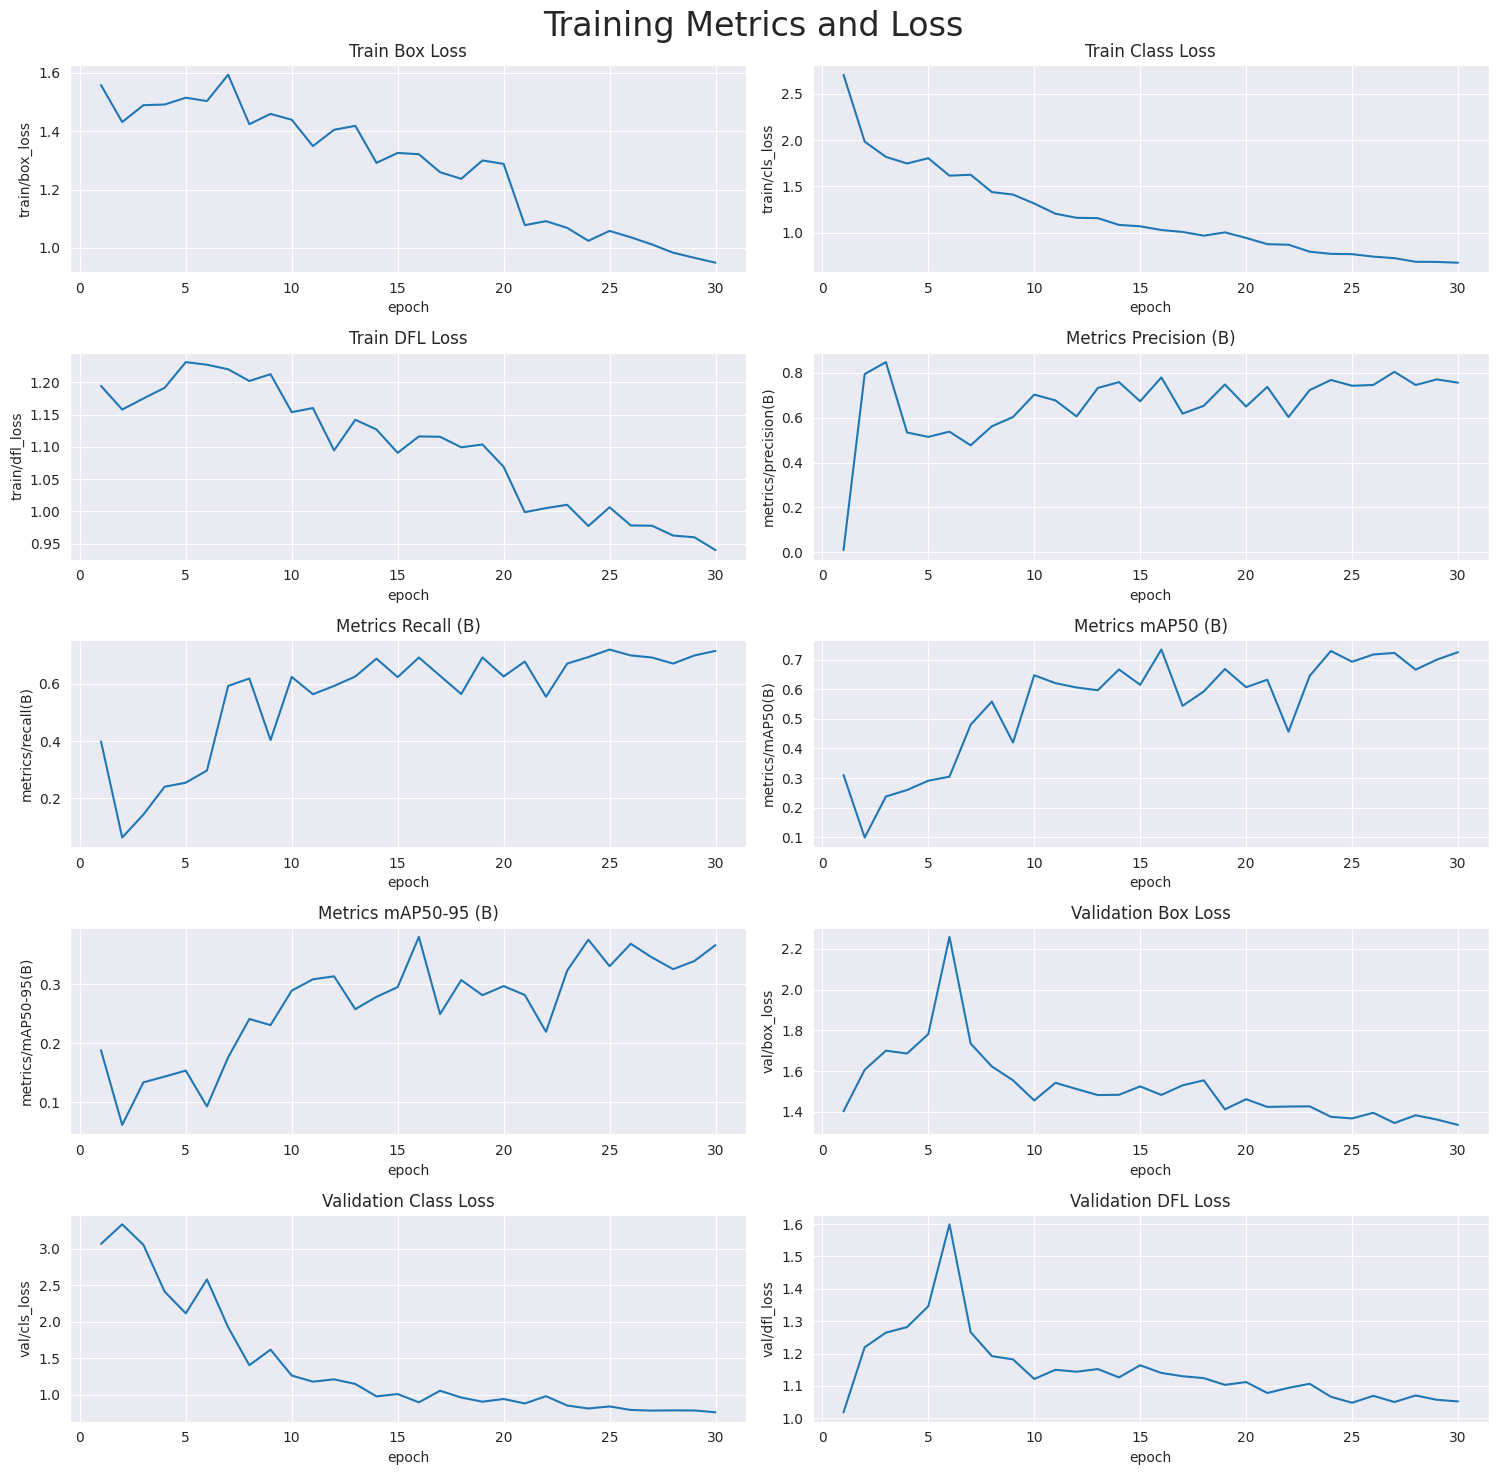

In [11]:
#@title Training Curves

%matplotlib inline
# read in the results.csv file as a pandas dataframe
df = pd.read_csv('/content/runs/detect/train/results.csv')
df.columns = df.columns.str.strip()

# create subplots using seaborn
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

# add suptitle and subheader
plt.suptitle('Training Metrics and Loss', fontsize=24)

# adjust top margin to make space for suptitle
plt.subplots_adjust(top=0.8)

# adjust spacing between subplots
plt.tight_layout()

plt.show()

In [12]:
# Loading the best performing model
model = YOLO('/content/runs/detect/train/weights/best.pt')

# Evaluating the model on the test dataset
metrics = model.val(conf = 0.25, split = 'test')

Ultralytics 8.3.8 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/data/test/labels... 125 images, 0 backgrounds, 0 corrupt: 100%|██████████| 125/125 [00:00<00:00, 678.38it/s]

val: New cache created: /content/data/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.33it/s]


                   all        125        267      0.746      0.618      0.723      0.507
Speed: 0.6ms preprocess, 8.7ms inference, 0.0ms loss, 6.0ms postprocess per image
Results saved to runs/detect/val


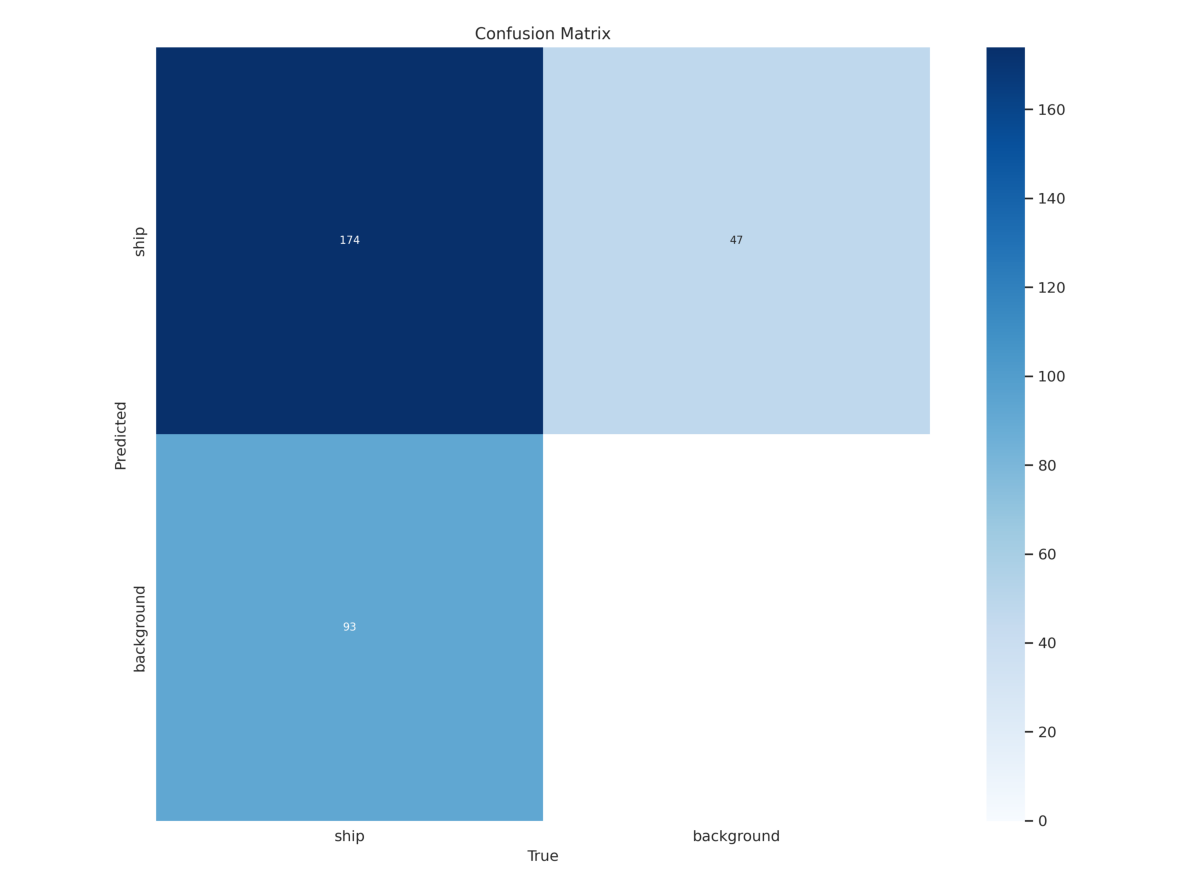

In [14]:
%matplotlib inline
# Reading the confusion matrix image file
img = mpimg.imread('/content/runs/detect/val/confusion_matrix.png')

# Plotting the confusion matrix image
fig, ax = plt.subplots(figsize = (15, 15))

ax.imshow(img)
ax.axis('off');

In [15]:
# Function to perform ship detections
def ship_detect(img_path):

    # Read the image
    img = cv2.imread(img_path)

    # Pass the image through the detection model and get the result
    detect_result = model(img)

    # Plot the detections
    detect_img = detect_result[0].plot()

    # Convert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

    return detect_img


0: 640x640 (no detections), 22.0ms
Speed: 2.4ms preprocess, 22.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 15.8ms
Speed: 4.4ms preprocess, 15.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 ships, 19.6ms
Speed: 2.6ms preprocess, 19.6ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 ship, 18.8ms
Speed: 3.6ms preprocess, 18.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 ships, 21.5ms
Speed: 4.5ms preprocess, 21.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 ships, 25.8ms
Speed: 2.7ms preprocess, 25.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 ship, 16.6ms
Speed: 2.2ms preprocess, 16.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 ship, 18.8ms
Speed: 2.2ms preprocess, 18.8ms inference, 2.4ms postprocess per image at shape (1, 

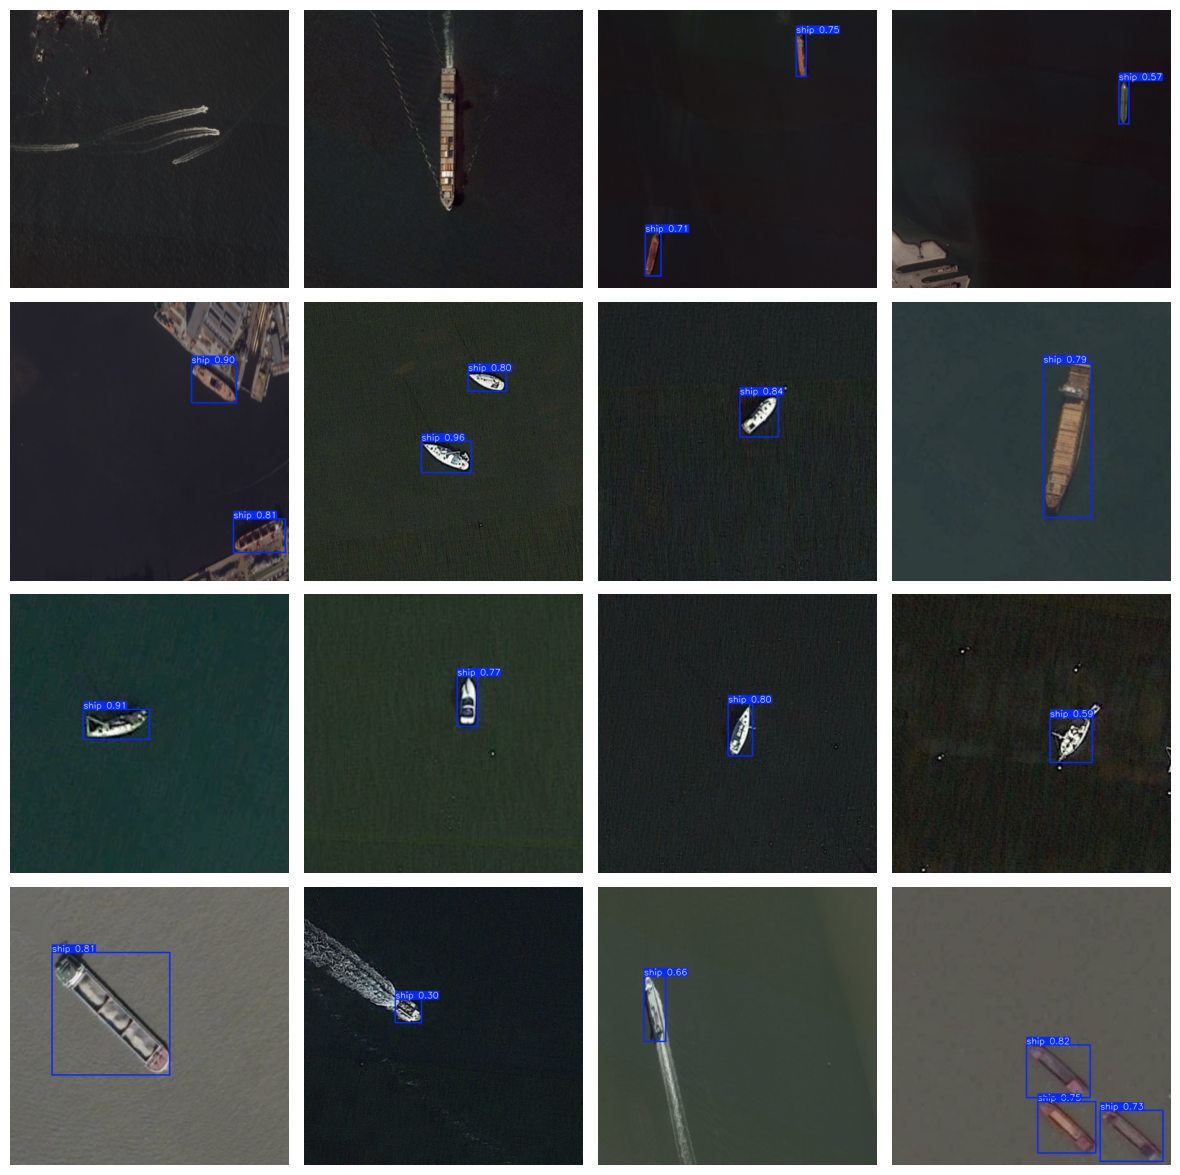

In [16]:
import random
import os

# Define the directory where the custom images are stored
custom_image_dir = '/content/data/test/images'

# Get the list of image files in the directory
image_files = os.listdir(custom_image_dir)

# Select 16 random images from the list
selected_images = random.sample(image_files, 16)

# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

# Iterate over the selected images and plot each one
for i, img_file in enumerate(selected_images):

    # Compute the row and column index of the current subplot
    row_idx = i // 4
    col_idx = i % 4

    # Load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = ship_detect(img_path)

    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)

In [17]:
model.export(format="onnx")

Ultralytics 8.3.8 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (5.2 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim==0.1.34', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.3/140.3 kB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 160.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.2/226.2 MB 172.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 156.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 219.3 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 23.0s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim==0.1.34', 'onnxruntime-gpu']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0

'/content/runs/detect/train/weights/best.onnx'